In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자크기
plt.rcParams['font.size'] = 14
# 적용한 폰트에 - 기호가 없다면 깨진다. - 기호는 설정한 폰트의
# 영향을 받지 않도록 설정한다.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

# 파일 경로
file_path = 'data/2022년 고령층 빈곤율_OECD.csv'

# 전체 파일 불러오기 (문제 줄 넘기기)
df_raw = pd.read_csv(file_path, encoding='utf-8', skiprows=3, names=['국가', '고령층 빈곤율(%)'])

# 쉼표 제거 및 숫자형 변환 (필요 시)
df_raw['고령층 빈곤율(%)'] = df_raw['고령층 빈곤율(%)'].astype(float)

# 결과 확인
print(df_raw.head())


            국가  고령층 빈곤율(%)
0        Korea        39.7
1      Estonia        37.4
2  New Zealand        33.7
3       Latvia        33.0
4      Croatia        28.5


In [3]:
country_mapping = {
    'Korea': '대한민국',
    'Estonia': '에스토니아',
    'New Zealand': '뉴질랜드',
    'Latvia': '라트비아',
    'Croatia': '크로아티아',
    'Costa Rica': '코스타리카',
    'Lithuania': '리투아니아',
    'United States': '미국',
    'Mexico': '멕시코',
    'Chile': '칠레',
    'Israel': '이스라엘',
    'United Kingdom': '영국',
    'Spain': '스페인',
    'Poland': '폴란드',
    'Slovenia': '슬로베니아',
    'Bulgaria': '불가리아',
    'Romania': '루마니아',
    'Italy': '이탈리아',
    'Türkiye': '튀르키예',
    'Austria': '오스트리아',
    'Canada': '캐나다',
    'Portugal': '포르투갈',
    'Hungary': '헝가리',
    'Greece': '그리스',
    'Ireland': '아일랜드',
    'Sweden': '스웨덴',
    'Belgium': '벨기에',
    'Czechia': '체코',
    'Slovak Rep.': '슬로바키아',
    'Luxembourg': '룩셈부르크',
    'France': '프랑스',
    'Finland': '핀란드',
    'Netherlands': '네덜란드',
    'Norway': '노르웨이',
    'Brazil': '브라질'
}


In [4]:
df_raw['국가'] = df_raw['국가'].replace(country_mapping)

In [5]:
df_raw

,국가,고령층 빈곤율(%)
0,대한민국,39.700000
1,에스토니아,37.400000
2,뉴질랜드,33.700000
3,라트비아,33.000000
4,크로아티아,28.500000
5,코스타리카,25.800000
6,리투아니아,24.600000
7,미국,23.100000
8,멕시코,18.300000
9,칠레,16.200000


In [6]:
df_raw.to_csv('data/2022년 고령층 빈곤율_OECD_전처리.csv', index=False, encoding='utf-8-sig')

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

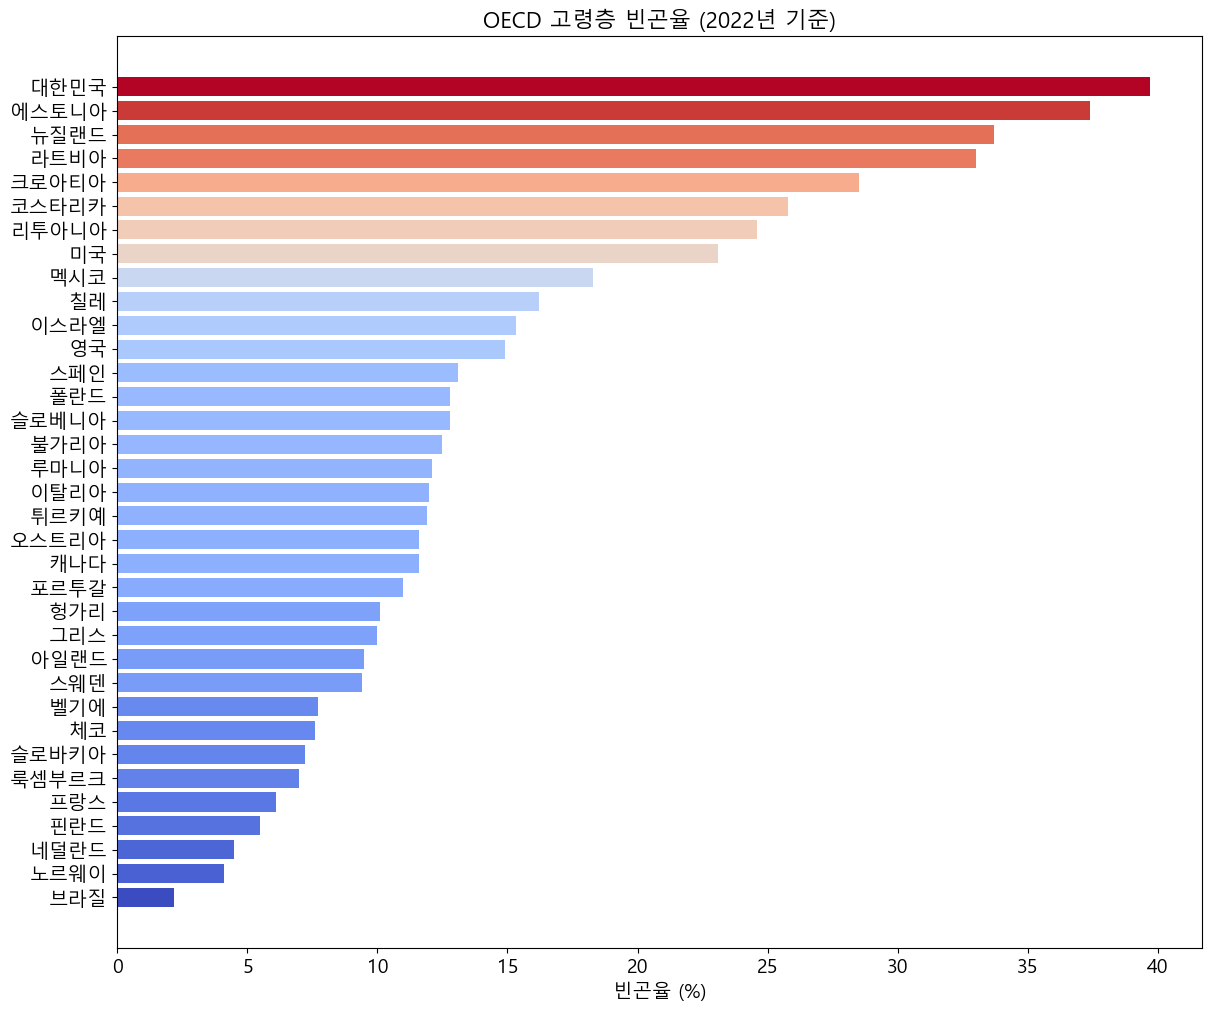

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 데이터 불러오기
df = pd.read_csv('data/2022년 고령층 빈곤율_OECD_전처리.csv', encoding='utf-8-sig')

# 내림차순 정렬
df_sorted = df.sort_values(by='고령층 빈곤율(%)', ascending=False)

# barh의 방향 맞추기 (빈곤율 높은 국가가 위쪽)
df_sorted = df_sorted[::-1]

# 색상 매핑
norm = Normalize(vmin=df_sorted['고령층 빈곤율(%)'].min(), vmax=df_sorted['고령층 빈곤율(%)'].max())
cmap = plt.get_cmap('coolwarm')
colors = cmap(norm(df_sorted['고령층 빈곤율(%)']))

plt.figure(figsize=(12, 10), constrained_layout=True)
plt.barh(df_sorted['국가'], df_sorted['고령층 빈곤율(%)'], color=colors)
plt.xlabel('빈곤율 (%)')
plt.title('OECD 고령층 빈곤율 (2022년 기준)', fontsize=16)

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('빈곤율 (%)')

plt.show()


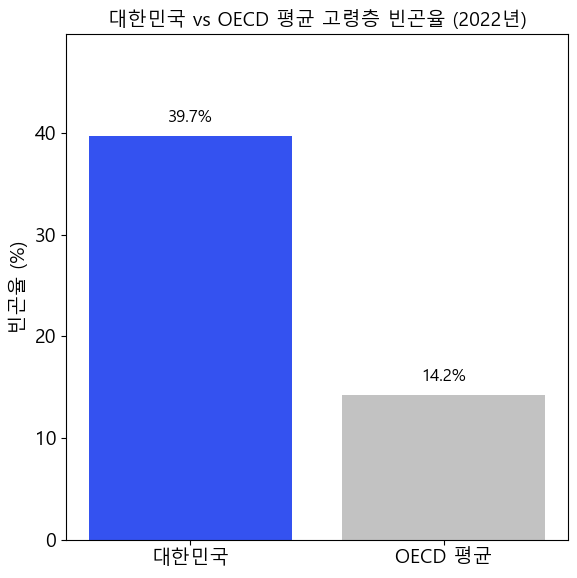

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# '고령층 빈곤율(%)' 컬럼이 문자열이라면 숫자로 변환
df['고령층 빈곤율(%)'] = pd.to_numeric(df['고령층 빈곤율(%)'], errors='coerce')

# 대한민국 값과 OECD 평균 계산
korea_rate = df[df['국가'] == '대한민국']['고령층 빈곤율(%)'].values[0]
oecd_mean = df[df['국가'] != '대한민국']['고령층 빈곤율(%)'].mean()

# 비교용 데이터프레임 생성
compare_df = pd.DataFrame({
    '국가': ['대한민국', 'OECD 평균'],
    '고령층 빈곤율(%)': [korea_rate, oecd_mean]
})

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(6, 6))
bars = plt.bar(compare_df['국가'], compare_df['고령층 빈곤율(%)'], color=['#3452F0', '#c2c2c2'])

# 수치 라벨 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('대한민국 vs OECD 평균 고령층 빈곤율 (2022년)', fontsize=14)
plt.ylabel('빈곤율 (%)')
plt.ylim(0, max(korea_rate, oecd_mean) + 10)
plt.tight_layout()
plt.show()
